# **Week 5 Lab Activities Introduction to Visualization**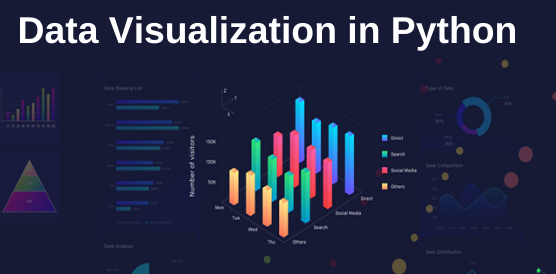

# **[COMSATS](https://www.cuilahore.edu.pk)**

In [ ]:
# Week 5 Lab Activities - Business Data Analysis with Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize


# **What is the first thing you need to do regarding saving your file?**

In [ ]:
# Titanic Dataset Exploration and Analysis - Lab Activities

# Introduction

# Dataset Overview: The Titanic dataset contains information about passengers
# who were aboard the Titanic when it sank in 1912. The dataset includes
# details such as passenger class, age, sex, fare, and survival status.


# Lab Objectives:
#Data Inspection and Cleaning: Learn how to inspect, clean, and preprocess data using basic pandas functions.

#Data Visualization: Create various types of plots (line, scatter, bar, histogram, pie) using Matplotlib to analyze and interpret the Titanic dataset.

# Interpretation: Understand when to use each type of plot and how to interpret the results.


# **Question: Why are we importing pandas and numpy when we are going to work in matplotlib ?**

# **Activity 1: Loading and inspecting data**

---



In [ ]:

# Load the dataset
#name it as titanic_df
titanic_df=pd.read_csv("Titanic-Dataset.csv")









In [ ]:

# Display first few rows
titanic_df.head(11)

NameError: name 'titanic_df' is not defined

In [ ]:

# Get the dimensions of the dataset


In [ ]:

# Get information about data types and missing values


In [ ]:


# Get summary statistics for numerical columns





In [ ]:
# Get summary statistics for categorical columns


**Key Takeaways**
Many passengers shared tickets and cabins, indicating group travel.
Most passengers embarked from Southampton (S).
There are a lot of missing values in the Cabin column (only 204 non-null values).
Most passengers were male (577 out of 891).

#  Data set description
  PassengerId   A unique identifier assigned to each passenger.
  Survived Indicates whether the passenger survived (1) or not (0).
  Pclass  The passenger's class (1 = First Class, 2 = Second Class, 3 = Third Class).
  Name   The full name of the passenger.
  Sex  The gender of the passenger (male or female).
  Age   The age of the passenger. Some values are missing .
  SibSp   The number of siblings and spouses the passenger had aboard the Titanic.
  Parch   The number of parents and children the passenger had aboard the Titanic.
  Ticket  The ticket number assigned to the passenger.
  Fare   The fare amount paid by the passenger.
  Cabin  The cabin number assigned to the passenger.
  Embarked  The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).

# **Activity 2: Identifying and Handling Missing Values**

---



In [ ]:
# Activity 2: Identifying and Handling Missing Values

# Count missing values per column



In [ ]:
# Visualize missing data
import missingno as msno
msno.matrix(df)
plt.show()


NameError: name 'df' is not defined

# **What does above error shows and how to fix it.**

In [ ]:
# Impute missing values for 'Age' with the median
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

#The distribution of Age in the Titanic dataset is not perfectly normal;
#it likely has a right skew due to outliers (e.g., very elderly passengers).
#The mean is sensitive to outliers, meaning a few extremely high or low ages could pull the mean up or down,
# making it less representative of the majority of passengers.
#The median, being the middle value, is not affected by extreme values,
# making it a better representation of central tendency in skewed data



<ipython-input-20-873bc62c70da>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median_age, inplace=True)


In [ ]:
# Drop the 'Cabin' column due to many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Recheck for missing values
titanic_df.isnull().sum()




,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Why are we dropping column instead of filling it with mean or mode?**

In [ ]:
#1. Too Many Missing Values (~77%)
#Since most of the values are missing, filling them with a single value (like "Unknown")
# would not add much useful information to the dataset.
#Imputing missing values with a median, mode, or predictive model would introduce
# too much guesswork and potential bias.
#2. Limited Predictive Value for Survival Analysis
#While first-class passengers were more likely to have recorded cabins,
#the actual cabin number may not strongly influence survival rates.
#The Pclass column (Passenger Class) already provides a similar distinction (First Class, Second Class, Third Class).
#3. High Cardinality and Complexity
#The Cabin column contains a mix of numbers and letters, making it categorical and high-cardinality (many unique values).
#Some passengers share cabins, but this information is not consistently recorded.
#4. Data Cleaning Simplicity
#Removing the Cabin column simplifies data preprocessing and improves model performance
#by avoiding unnecessary complexity

In [ ]:
# impute embarked with mode

# Impute missing 'Embarked' values with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
#You can also use iloc as used in below code
#titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode().iloc[0], inplace=True)

<ipython-input-6-c90e5ee50c19>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


# **Activity 3: Checking and Fixing Duplicates**

---



In [ ]:
# Activity 3: Checking and Fixing Duplicates

titanic_df.shape  #check the shape before removing

(891, 11)

In [ ]:
#Checking and Fixing Duplicates
# Count duplicate rows
titanic_df.duplicated().sum()



0

In [ ]:
# Remove duplicate rows (if any)
titanic_df.drop_duplicates(inplace=True)
titanic_df.shape  # Check the shape after removal




(891, 11)

# **Activity 4: Visuaizations-Histogram**

---



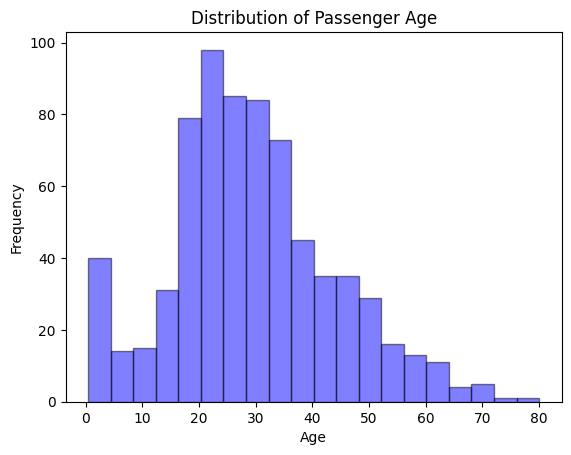

In [ ]:
# Activity 4:Histogram
plt.hist(titanic_df['Age'], bins= 20, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Age')
plt.show()


**How do you interpret above output**

In [ ]:
#When to use: Histograms help in understanding the distribution of a continuous
#variable (Age in this case).
#This can reveal patterns such as whether most passengers were young or old.

In [ ]:

# Challenge Questions based on the Histogram of Passenger Ages
# Please write your answers in the space provided

# 1. What does the x-axis of the histogram represent?
# Answer:

# 2. What does the y-axis of the histogram represent?
# Answer:

# 3. Approximately what age range had the highest frequency of passengers?
# Answer:

# 4.  Is the distribution of passenger ages roughly symmetrical or skewed? If skewed, in which direction?
# Answer:

# 5.  What can you infer about the age demographics of the Titanic passengers based on the histogram?
# Answer:

In [ ]:
# create a histogram with 10 bins




# **Activity 5: Bar Charts**

---



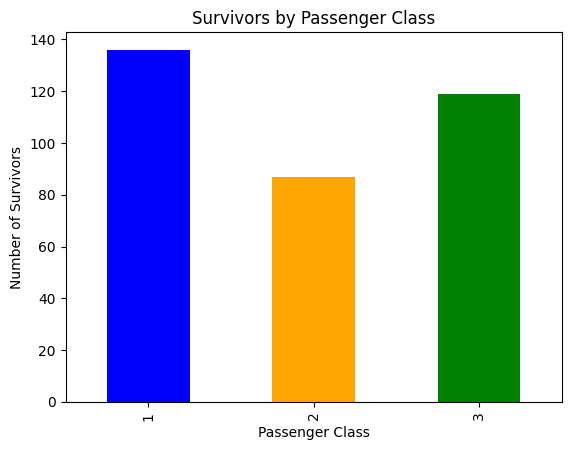

In [ ]:
# Bar Chart - Survival Count by Class
survival_by_class = titanic_df.groupby('Pclass')['Survived'].sum()
survival_by_class.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Passenger Class')
plt.show()

# **What is the key difference between the syntax of Bar Chart and Histogram?**

In [ ]:
#Write your answer here


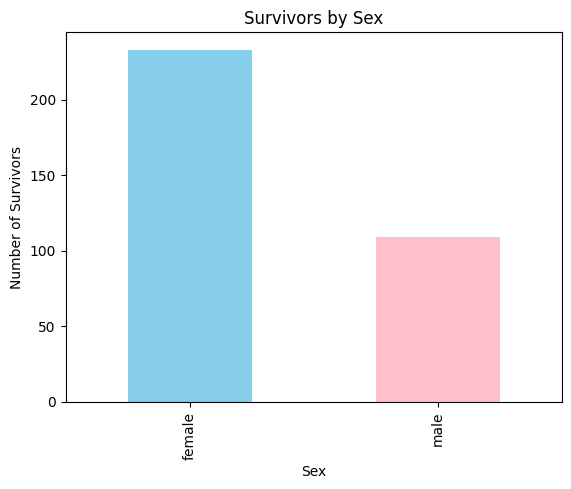

In [ ]:
# Create a Bar Chart for Survivors by Sex

# Bar Chart - Survival Count by Sex
survival_by_sex = titanic_df.groupby('Sex')['Survived'].sum()
survival_by_sex.plot(kind='bar', color=['skyblue', 'pink'])
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Survivors by Sex')
plt.show()


## **Student Challenge**

In [ ]:

# Calculate average fare by embarkation port

#Calculate average fare by port


#Now Create A Bar Chart
# Bar chart for average fare by embarkation port
average_fare_by_port.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Embarkation Port')
plt.ylabel('Average Fare')
plt.title('Your name Presentation - Average Fare by Embarkation Port')
#For example if your name is Noman , write in the title Noman Presentation-Average Fare by Embarkation Port
plt.show()


# **Activity 6: Pie Charts**

---



**When to use: Pie charts are useful for displaying proportional distributions. This helps to see the ratio of male to female passengers.**

In [ ]:
gender_counts = titanic_df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Passengers')
plt.show()

**What is the key difference between Pie Chart and Bar Chart Syntax?**

In [ ]:

# Group data by sex and survival status
survived_by_sex = titanic_df.groupby('Sex')['Survived'].sum()

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.pie(survived_by_sex, labels=survived_by_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution by Sex')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#dotIndex (.index) retrieves the labels ('male' and 'female') from the index of the Series and uses them as labels for the pie chart
#%1.1f`: This is a numerical format specifier.
    # `1`:  Specifies the minimum number of digits to display before the decimal point. If the number has fewer digits, leading spaces are added.  In this case, it's one digit, meaning that if the percentage is less than 10, there will be one digit before the decimal (e.g. 9.5 or 1.2)
    # `.1`: Specifies the precision (the number of decimal places).  `.1` means that only one digit after the decimal point will be shown.
    # `f`: Indicates that the number should be formatted as a floating-point number.
# `%%`:  This represents a literal percentage sign. Because `%` is a special character used for formatting, you need to use `%%` to get a single `%` in the output.


#So `autopct='%1.1f%%'` will display percentages on the slices of the pie chart, showing one digit before and one digit after the decimal point, followed by a percent sign (e.g., "30.5%").


#startangle=90` in the `plt.pie()` function sets the starting angle of the first slice in the pie chart.  Angles in Matplotlib are measured in degrees counterclockwise from the positive x-axis.  A `startangle=90` means that the first slice will begin at the top of the circle (90 degrees).  You can change this value to rotate the pie chart.

# `%1.1f%%`:  Displays a floating-point number with at least one digit before and exactly one digit after the decimal point, followed by a percent sign. The whole number part can be more than one digit if needed.


# **Activity 8: Scatter Plot**

---



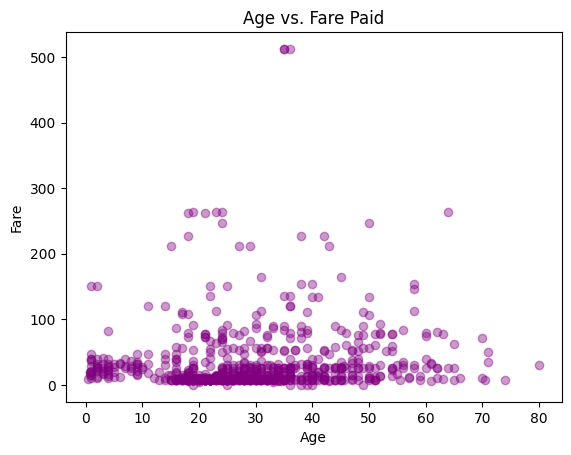

In [ ]:
#Scatter Plot - Age vs. Far
plt.scatter(titanic_df['Age'], titanic_df['Fare'], alpha=0.4, color='purple')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare Paid')
plt.show()

***Are there any outliers? ***

**Is there any relationship between the variavles Age and Fare evident from the scatter plot?**

# **Activity 9: Stacked barchart**

---



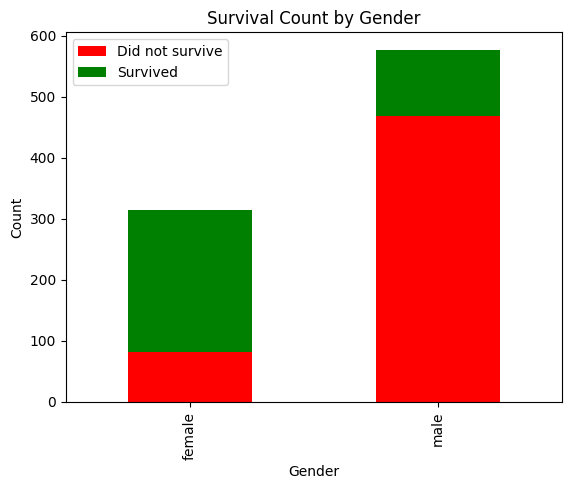

In [ ]:
#Stacked Bar Chart - Survival by Gender
survival_by_gender_stacked = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_gender_stacked.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend(['Did not survive', 'Survived'])
plt.show()

NameError: name 'gender_counts' is not defined

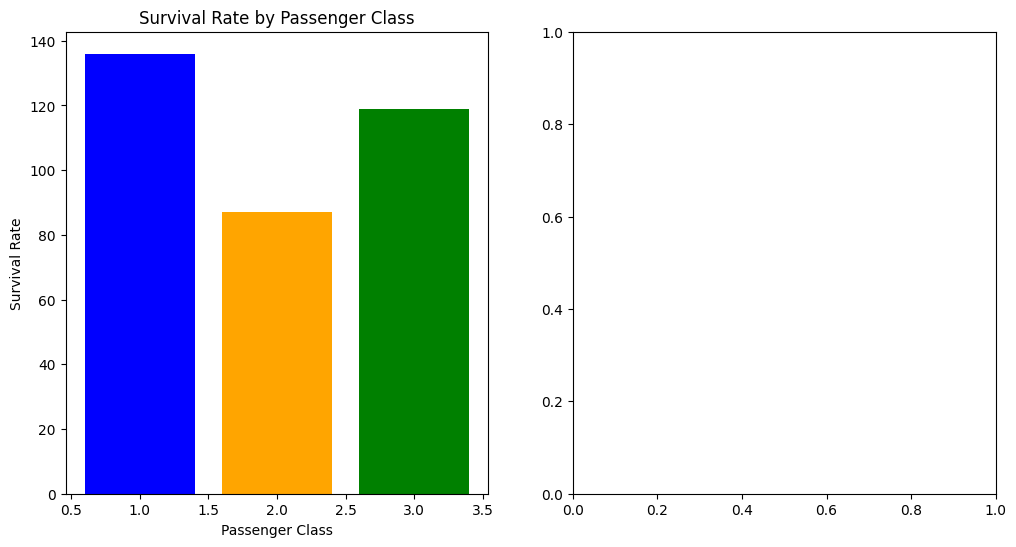

In [ ]:
plt.figure(figsize=(12, 6))

# First subplot: Bar chart of survival rate by class
plt.subplot(1, 2, 1)
plt.bar(survival_by_class.index, survival_by_class.values, color=["blue", "orange", "green"])
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")

# Second subplot: Pie chart of gender distribution
plt.subplot(1, 2, 2)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"])
plt.title("Proportion of Passengers by Gender")

plt.tight_layout()
plt.show()

#The numbers 1, 2, 1 define the layout of the subplot grid in Matplotlib.
#nrows = 1 → Number of rows in the subplot grid (1 row).
#ncols = 2 → Number of columns in the subplot grid (2 columns).
#index = 1 → Position of the current subplot (first subplot).

In [ ]:
#interpretation
#Age by Pclass: First-class passengers were the oldest on average (38.2 years), followed by second-class (29.9 years) and third-class (25.1 years), indicating older individuals tended to afford higher-class tickets.
#Fare by Pclass: First-class passengers paid the highest average fare ($84.15), while second-class paid significantly less ($20.66) and third-class the least ($13.68), reflecting the cost difference between ticket classes

In [ ]:

print("\nLab Completed Successfully!")


# **Activity 9: Exporting Data and Saving a new file**

In [ ]:
#Save the cleaned dataset to a new CSV file named "Brand_New_Titanic-Dataset.csv".


#Important: This command will create a new data set that would appear on left handside
# You can download that file for your record.

In [ ]:
# !pip install --upgrade visions --use-deprecated=legacy-resolver
#!pip uninstall pandas-profiling -y
!pip install visions==0.7.6 --use-deprecated=legacy-resolver

!pip install --upgrade numba --use-deprecated=legacy-resolver
# !pip install --upgrade pandas-profiling --use-deprecated=legacy-resolver
!pip install ydata-profiling --use-deprecated=legacy-resolver



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
cuml-cu12 25.2.1 requires numba<0.61.0a0,>=0.59.1, but you'll have numba 0.61.0 which is incompatible.
distributed-ucxx-cu12 0.42.0 requires numba<0.61.0a0,>=0.59.1, but you'll have numba 0.61.0 which is incompatible.
dask-cuda 25.2.0 requires numba<0.61.0a0,>=0.59.1, but

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report") #df is your dataframe
profile.to_notebook_iframe() #To show the report inline in the notebook
#profile.to_file("your_report.html") #To save the report as an HTML file


### **Home Work**

In [ ]:


# Homework Activities: Titanic Dataset Analysis

# Instructions: Use the Titanic dataset (Titanic-Dataset.csv) to complete the following activities.

# Activity 1:  Create a histogram of the 'Fare' column with 30 bins and a different color.




# Activity 2: Create a bar chart showing the number of passengers who embarked at each port.

# What does this chart shows. What it help us to understand :
#Answer:

# Activity 3: Create a pie chart showing the proportion of male and female survivors.

# What does this pie chart illustrate?

#Answer:


# Activity 4: Create a scatter plot of 'Age' vs. 'SibSp' (number of siblings/spouses aboard).


# What does scatterplot shows?.
#Answer:

# Activity 5: Create a bar chart to compare the average age of survivors and non-survivors.


# Answer: What does this bar chart compares?

# Activity 6:  Create a horizontal bar chart that displays the number of passengers in each passenger class (Pclass).

# What does this horizontal bar chart displays.
#Answer:
